# Promedios Móviles - Proyecto

En este documento se va a construir el código para el modelo de promedios móviles. 

Paso 1. Importar librerías / paquetes

In [1]:
#pip install pandas - https://calebshortt.com/2016/01/15/installing-scikit-learn-python-data-mining-library/
#https://docs.anaconda.com/anaconda/navigator/tutorials/pandas/
import pandas as pd

In [2]:
from sklearn.metrics import mean_absolute_error

In [3]:
import matplotlib.pyplot as plt

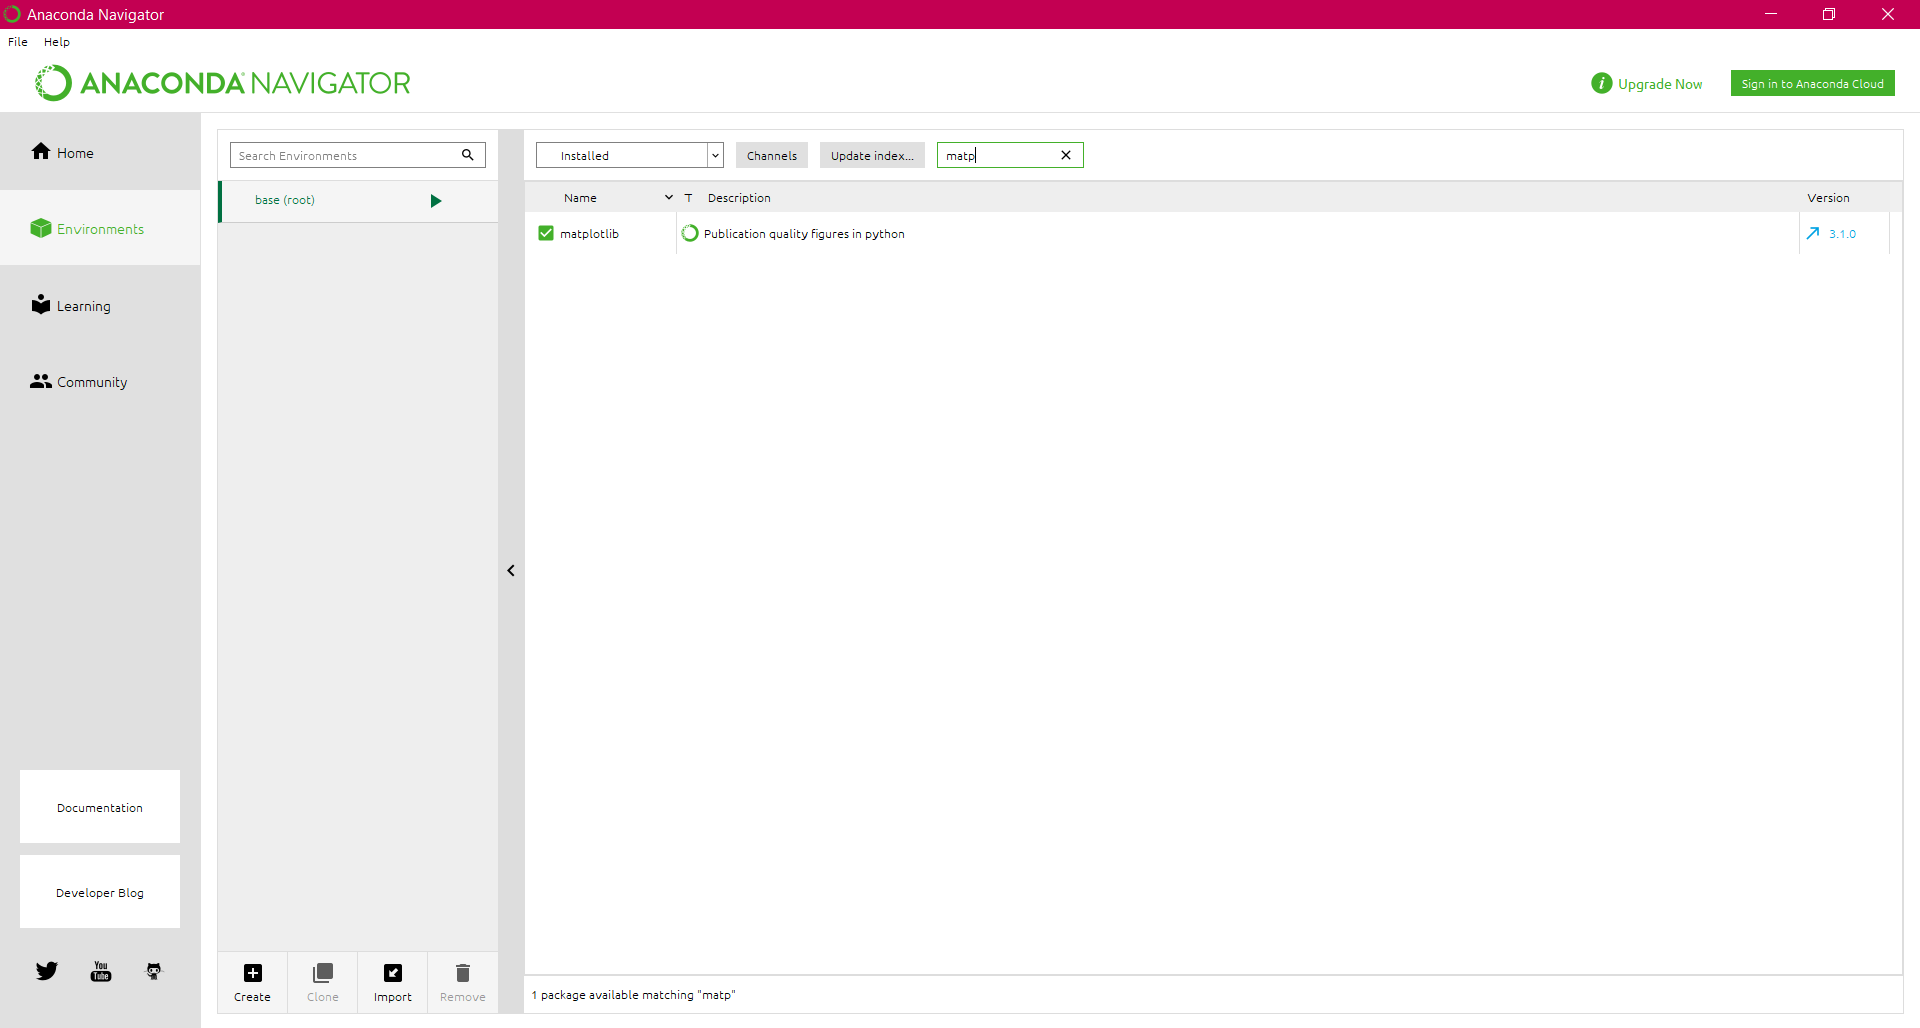

Paso 2. Leer datos

In [4]:
datos = pd.read_csv("datos_completos.csv")

In [5]:
datos.head(10)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,ventas_totales_en_tienda_de_cada_mes,ventas_promedio_en_tienda_de_cada_mes,ventas_totales_en_tienda_de_cada_sku,ventas_promedio_en_tienda_de_cada_sku,ventas_totales_1_mes_pasado,...,ventas_totales_tienda_y_mes_3_pasado,ventas_promedio_tienda_y_mes_del_mes_pasado,ventas_promedio_tienda_y_mes_2_pasado,ventas_promedio_tienda_y_mes_3_pasado,ventas_totales_tienda_y_sku_del_mes_pasado,ventas_totales_tienda_y_sku_2_pasado,ventas_totales_tienda_y_sku_3_pasado,ventas_promedio_tienda_y_sku_del_mes_pasado,ventas_promedio_tienda_y_sku_2_pasado,ventas_promedio_tienda_y_sku_3_pasado
0,1,0,1,2,0,23,0.676471,3778,1.988421,2,...,23,0.676471,0.676471,0.676471,3778,3778,3778,1.988421,1.988421,1.988421
1,1,1,1,0,1,27,0.794118,3461,1.821579,2,...,23,0.676471,0.676471,0.676471,3778,3778,3778,1.988421,1.988421,1.988421
2,1,2,1,1,0,28,0.823529,594,0.312632,0,...,23,0.794118,0.676471,0.676471,3461,3778,3778,1.821579,1.988421,1.988421
3,1,3,1,0,0,31,0.911765,848,0.446316,1,...,23,0.823529,0.794118,0.676471,594,3461,3778,0.312632,1.821579,1.988421
4,1,4,1,0,0,37,1.088235,408,0.214737,0,...,27,0.911765,0.823529,0.794118,848,594,3461,0.446316,0.312632,1.821579
5,1,5,1,0,0,12,0.352941,348,0.183158,0,...,28,1.088235,0.911765,0.823529,408,848,594,0.214737,0.446316,0.312632
6,1,6,1,0,0,38,1.117647,33,0.017368,0,...,31,0.352941,1.088235,0.911765,348,408,848,0.183158,0.214737,0.446316
7,1,7,1,0,0,43,1.264706,30,0.015789,0,...,37,1.117647,0.352941,1.088235,33,348,408,0.017368,0.183158,0.214737
8,1,8,1,0,0,32,0.941176,18,0.009474,0,...,12,1.264706,1.117647,0.352941,30,33,348,0.015789,0.017368,0.183158
9,1,0,2,5,0,23,0.676471,1727,0.908947,5,...,23,0.676471,0.676471,0.676471,1727,1727,1727,0.908947,0.908947,0.908947


In [6]:
datos.shape

(581400, 24)

In [7]:
datos.columns

Index(['pdv_id', 'mes_id', 'sku_id', 'ventas_totales',
       'y_ventas_siguiente_mes', 'ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'],
      dtype='object')

Paso 3. Eliminar columnas innecesarias en MA

In [8]:
datos_ma = datos.drop(['ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'], axis=1)

In [9]:
datos_ma.head(10)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes
0,1,0,1,2,0
1,1,1,1,0,1
2,1,2,1,1,0
3,1,3,1,0,0
4,1,4,1,0,0
5,1,5,1,0,0
6,1,6,1,0,0
7,1,7,1,0,0
8,1,8,1,0,0
9,1,0,2,5,0


Paso 4. Primer modelo: Pedir lo del mes anterior 

In [10]:
#pedir lo del mes anteior
datos_ma['m1_pedir_lo_del_mes_pasado'] = datos_ma['ventas_totales']

In [11]:
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado
0,1,0,1,2,0,2
1,1,1,1,0,1,0
2,1,2,1,1,0,1
3,1,3,1,0,0,0
4,1,4,1,0,0,0
5,1,5,1,0,0,0
6,1,6,1,0,0,0
7,1,7,1,0,0,0
8,1,8,1,0,0,0
9,1,0,2,5,0,5


Paso 5. Pedir un promedio de los dos meses anteriores (3:44 - 3:44 menos de 1 minuto)

In [12]:
#Pedir un promedio de los 2 meses anteriores 
datos_ma['m2_promedio_de_dos_meses_anteriores'] = datos_ma.groupby(['pdv_id','sku_id']).rolling(2)['ventas_totales'].mean().reset_index(drop=True)


1. Crear nueva columna 
2. Agrupar por punto de venta y sku
3. Función rolling: Proporcione cálculos de ventana rodante.
4. Función resent index - si no lo colocamos sale error - como tenemos un group_by el resultado en sí del comando queda como un conjunto de datos indexados, los cuales no se pueden poner en una columna, por lo tanto, hay que descartar esos índices. 

In [13]:
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores
0,1,0,1,2,0,2,NaN
1,1,1,1,0,1,0,1.0
2,1,2,1,1,0,1,0.5
3,1,3,1,0,0,0,0.5
4,1,4,1,0,0,0,0.0
5,1,5,1,0,0,0,0.0
6,1,6,1,0,0,0,0.0
7,1,7,1,0,0,0,0.0
8,1,8,1,0,0,0,0.0
9,1,0,2,5,0,5,NaN


Paso 6. Pedir un promedio de los 3 meses anteriores (1 min apróx. )

In [14]:
#Pedir un promedio de los 2 meses anteriores 
datos_ma['m3_promedio_de_tres_meses_anteriores'] = datos_ma.groupby(['pdv_id','sku_id']).rolling(3)['ventas_totales'].mean().reset_index(drop=True)
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
0,1,0,1,2,0,2,NaN,NaN
1,1,1,1,0,1,0,1.0,NaN
2,1,2,1,1,0,1,0.5,1.000000
3,1,3,1,0,0,0,0.5,0.333333
4,1,4,1,0,0,0,0.0,0.333333
5,1,5,1,0,0,0,0.0,0.000000
6,1,6,1,0,0,0,0.0,0.000000
7,1,7,1,0,0,0,0.0,0.000000
8,1,8,1,0,0,0,0.0,0.000000
9,1,0,2,5,0,5,NaN,NaN


Paso 7. Calcular errores

Paso 7.1 Dividir en conjuntos de datos por mes 

In [15]:
error_julio= datos_ma[datos_ma.mes_id == 0]
error_julio.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
0,1,0,1,2,0,2,NaN,NaN
9,1,0,2,5,0,5,NaN,NaN
18,1,0,3,4,6,4,NaN,NaN
27,1,0,4,2,0,2,NaN,NaN
36,1,0,5,2,2,2,NaN,NaN


In [16]:
error_agosto= datos_ma[datos_ma.mes_id == 1]
error_agosto.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
1,1,1,1,0,1,0,1.0,NaN
10,1,1,2,0,1,0,2.5,NaN
19,1,1,3,6,4,6,5.0,NaN
28,1,1,4,0,0,0,1.0,NaN
37,1,1,5,2,0,2,2.0,NaN


In [17]:
error_septiembre= datos_ma[datos_ma.mes_id == 2]
error_septiembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
2,1,2,1,1,0,1,0.5,1.000000
11,1,2,2,1,4,1,0.5,2.000000
20,1,2,3,4,2,4,5.0,4.666667
29,1,2,4,0,0,0,0.0,0.666667
38,1,2,5,0,0,0,1.0,1.333333


In [18]:
error_octubre= datos_ma[datos_ma.mes_id == 3]
error_octubre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
3,1,3,1,0,0,0,0.5,0.333333
12,1,3,2,4,3,4,2.5,1.666667
21,1,3,3,2,0,2,3.0,4.000000
30,1,3,4,0,0,0,0.0,0.000000
39,1,3,5,0,0,0,0.0,0.666667


In [19]:
error_noviembre= datos_ma[datos_ma.mes_id == 4]
error_noviembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
4,1,4,1,0,0,0,0.0,0.333333
13,1,4,2,3,1,3,3.5,2.666667
22,1,4,3,0,1,0,1.0,2.000000
31,1,4,4,0,0,0,0.0,0.000000
40,1,4,5,0,0,0,0.0,0.000000


In [20]:
error_diciembre= datos_ma[datos_ma.mes_id == 5]
error_diciembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
5,1,5,1,0,0,0,0.0,0.000000
14,1,5,2,1,0,1,2.0,2.666667
23,1,5,3,1,0,1,0.5,1.000000
32,1,5,4,0,0,0,0.0,0.000000
41,1,5,5,0,0,0,0.0,0.000000


In [21]:
error_enero= datos_ma[datos_ma.mes_id == 6]
error_enero.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
6,1,6,1,0,0,0,0.0,0.000000
15,1,6,2,0,3,0,0.5,1.333333
24,1,6,3,0,3,0,0.5,0.333333
33,1,6,4,0,0,0,0.0,0.000000
42,1,6,5,0,0,0,0.0,0.000000


In [22]:
error_febrero= datos_ma[datos_ma.mes_id == 7]
error_febrero.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
7,1,7,1,0,0,0,0.0,0.000000
16,1,7,2,3,2,3,1.5,1.333333
25,1,7,3,3,1,3,1.5,1.333333
34,1,7,4,0,0,0,0.0,0.000000
43,1,7,5,0,0,0,0.0,0.000000


In [23]:
error_febrero.shape

(64600, 8)

In [24]:
error_marzo= datos_ma[datos_ma.mes_id == 8]
error_marzo.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
8,1,8,1,0,0,0,0.0,0.000000
17,1,8,2,2,0,2,2.5,1.666667
26,1,8,3,1,0,1,2.0,1.333333
35,1,8,4,0,0,0,0.0,0.000000
44,1,8,5,0,0,0,0.0,0.000000


In [25]:
error_marzo.shape

(64600, 8)

Paso 7.2. Calcular el error mes/modelo (un valor por objeto creado)

In [26]:
#cálculo manual 
#sum(abs(error_julio['y_ventas_siguiente_mes'] - error_julio['m1_pedir_lo_del_mes_pasado']))/64600

In [27]:
error_m1_julio = mean_absolute_error(error_julio['y_ventas_siguiente_mes'], error_julio['m1_pedir_lo_del_mes_pasado'])
error_m2_julio = None
error_m3_julio = None

In [28]:
error_m1_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m1_pedir_lo_del_mes_pasado'])
error_m2_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m2_promedio_de_dos_meses_anteriores'])
error_m3_agosto = None

In [29]:
error_m1_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m1_pedir_lo_del_mes_pasado'])
error_m2_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m3_promedio_de_tres_meses_anteriores'])

In [30]:
error_m1_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m1_pedir_lo_del_mes_pasado'])
error_m2_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m2_promedio_de_dos_meses_anteriores'])
error_m3_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m3_promedio_de_tres_meses_anteriores'])

In [31]:
error_m1_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m1_pedir_lo_del_mes_pasado'])
error_m2_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m3_promedio_de_tres_meses_anteriores'])

In [32]:
error_m1_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m1_pedir_lo_del_mes_pasado'])
error_m2_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m3_promedio_de_tres_meses_anteriores'])

In [33]:
error_m1_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m1_pedir_lo_del_mes_pasado'])
error_m2_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m2_promedio_de_dos_meses_anteriores'])
error_m3_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m3_promedio_de_tres_meses_anteriores'])

In [34]:
error_m1_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m1_pedir_lo_del_mes_pasado'])
error_m2_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m2_promedio_de_dos_meses_anteriores'])
error_m3_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m3_promedio_de_tres_meses_anteriores'])

In [35]:
error_m1_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m1_pedir_lo_del_mes_pasado'])
error_m2_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m2_promedio_de_dos_meses_anteriores'])
error_m3_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m3_promedio_de_tres_meses_anteriores'])

Paso 7.3 Crear dataframe con errores

In [36]:
errores_mae = [['Julio', error_m1_julio, error_m2_julio, error_m3_julio],
               ['Agosto', error_m1_agosto, error_m2_agosto, error_m3_agosto],
               ['Septiembre', error_m1_septiembre, error_m2_septiembre, error_m3_septiembre],
               ['Octubre', error_m1_octubre, error_m2_octubre, error_m3_octubre],
               ['Noviembre', error_m1_noviembre, error_m2_noviembre, error_m3_noviembre],
               ['Diciembre', error_m1_diciembre, error_m2_diciembre, error_m3_diciembre],
               ['Enero', error_m1_enero, error_m2_enero, error_m3_enero],
               ['Febrero', error_m1_febrero, error_m2_febrero, error_m3_febrero],
               ['Marzo', error_m1_marzo, error_m2_marzo, error_m3_marzo]
              ]
mae = pd.DataFrame(errores_mae, columns = ['Mes', 'mae_pedir_anterior','mae_promedio_2_meses_anteriores','mae_promedio_3_meses_anteriores'])
mae

,Mes,mae_pedir_anterior,mae_promedio_2_meses_anteriores,mae_promedio_3_meses_anteriores
0,Julio,0.481130,NaN,NaN
1,Agosto,0.483963,0.508320,NaN
2,Septiembre,0.412183,0.420619,0.447441
3,Octubre,0.559613,0.589714,0.612761
4,Noviembre,0.442152,0.394621,0.417647
5,Diciembre,0.578065,0.610937,0.611775
6,Enero,0.612879,0.502175,0.505237
7,Febrero,0.488421,0.570341,0.559272
8,Marzo,0.491486,0.438824,0.500547


Paso 7.4 Crear gráfica 

Text(0.5, 1.0, 'Error Absoluto Total en Modelos Base')

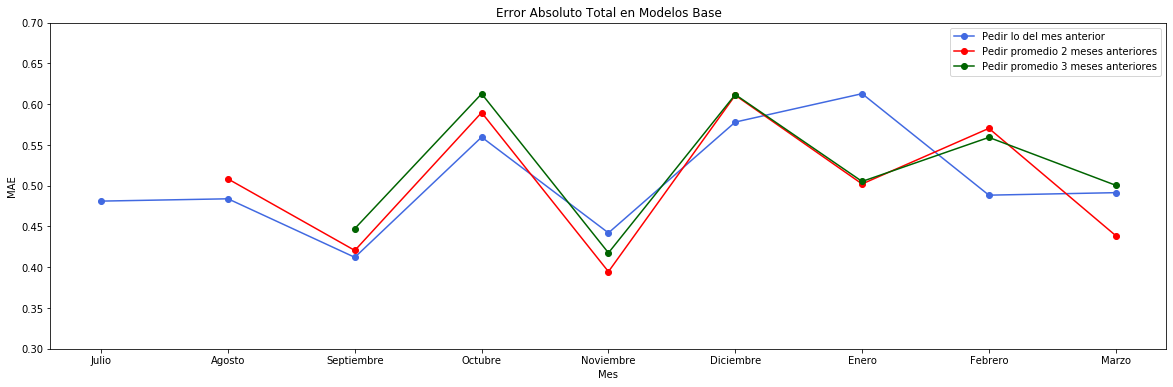

In [37]:
plt.figure(figsize=(20,6)) #impresión de la figura
plt.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="royalblue")
plt.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="red")
plt.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="darkgreen")
plt.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
plt.ylim(0.3, .7)
plt.ylabel('MAE')
plt.xlabel('Mes')
plt.title('Error Absoluto Total en Modelos Base')

¡Comando adicional! Dos gráficas (o más) en una figura 

Text(0.5, 1.0, 'Error Absoluto Total en Modelos Base - opción 2')

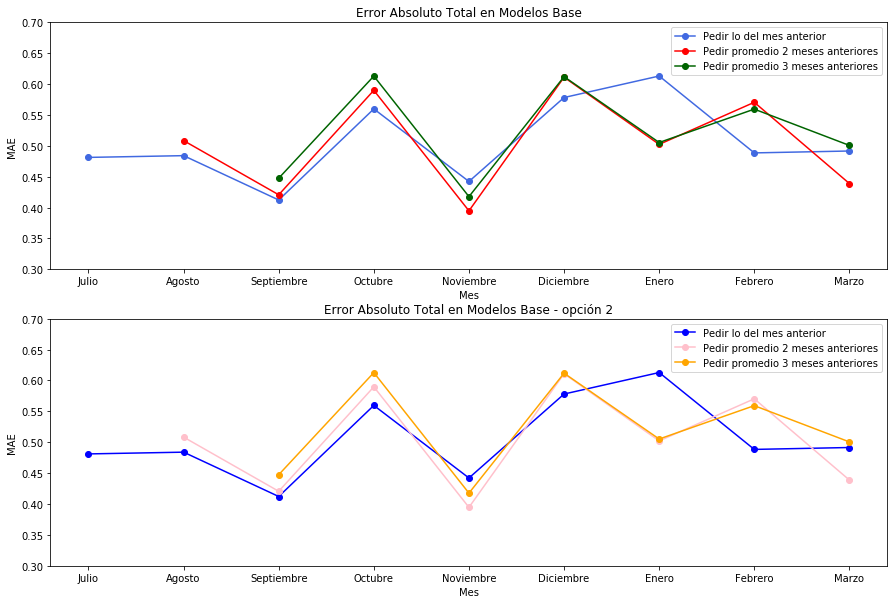

In [38]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="royalblue")
plt.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="red")
plt.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="darkgreen")
plt.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
plt.ylim(0.3, .7)
plt.ylabel('MAE')
plt.xlabel('Mes')
plt.title('Error Absoluto Total en Modelos Base')

plt.subplot(2,1,2)
plt.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="blue")
plt.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="pink")
plt.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="orange")
plt.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
plt.ylim(0.3, .7)
plt.ylabel('MAE')
plt.xlabel('Mes')
plt.title('Error Absoluto Total en Modelos Base - opción 2')

## CONCLUSIONES 